<a href="https://colab.research.google.com/github/ttu1984wei/AI_practice/blob/main/20220714_CNN_CIFAR_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

上方「編輯」=> 「筆記本設定」=> 「硬體加速器」=> 選擇「GPU」

In [2]:
%matplotlib inline
import tensorflow as tf
import keras
from tensorflow.keras.datasets import mnist, cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, MaxPooling2D
from tensorflow.keras.layers import Dense, Flatten, Activation
from tensorflow.keras.optimizers import SGD, Adam
from keras.layers import Dropout
from keras.utils import np_utils

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import signal

In [3]:
# 指定亂數種子
seed = 10
np.random.seed(seed)
# 載入資料集
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170508288/170498071 [==============================] - 13s 0us/step


In [4]:
x_train.shape

(50000, 32, 32, 3)

In [5]:
#正規化
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

In [6]:
# One-hot編碼
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [7]:
y_train.shape

(50000, 10)

In [22]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), padding='same',
         input_shape=x_train.shape[1:], activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, kernel_size=(3, 3), padding='same',
          activation='relu'))#不需要input
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 16, 16, 32)        0         
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 8, 8, 64)         

In [23]:
#編譯模型
model.compile(loss='mse', #'categorical_crossentropy',
              optimizer=Adam(learning_rate=0.001),#'adam', 
              metrics=['accuracy'])

In [24]:
#訓練模型
history = model.fit(x_train, y_train, validation_split=0.2, 
                    epochs=20, batch_size=128, verbose=2)

Epoch 1/20
313/313 - 3s - loss: 0.0745 - accuracy: 0.3738 - val_loss: 0.0644 - val_accuracy: 0.4978 - 3s/epoch - 9ms/step
Epoch 2/20
313/313 - 2s - loss: 0.0616 - accuracy: 0.5187 - val_loss: 0.0565 - val_accuracy: 0.5760 - 2s/epoch - 7ms/step
Epoch 3/20
313/313 - 2s - loss: 0.0558 - accuracy: 0.5733 - val_loss: 0.0506 - val_accuracy: 0.6307 - 2s/epoch - 7ms/step
Epoch 4/20
313/313 - 2s - loss: 0.0515 - accuracy: 0.6101 - val_loss: 0.0481 - val_accuracy: 0.6459 - 2s/epoch - 7ms/step
Epoch 5/20
313/313 - 2s - loss: 0.0485 - accuracy: 0.6388 - val_loss: 0.0455 - val_accuracy: 0.6642 - 2s/epoch - 7ms/step
Epoch 6/20
313/313 - 2s - loss: 0.0465 - accuracy: 0.6565 - val_loss: 0.0439 - val_accuracy: 0.6788 - 2s/epoch - 7ms/step
Epoch 7/20
313/313 - 2s - loss: 0.0444 - accuracy: 0.6762 - val_loss: 0.0426 - val_accuracy: 0.6898 - 2s/epoch - 7ms/step
Epoch 8/20
313/313 - 2s - loss: 0.0428 - accuracy: 0.6885 - val_loss: 0.0410 - val_accuracy: 0.7047 - 2s/epoch - 7ms/step
Epoch 9/20
313/313 - 2s 

In [25]:
#評估模型
print('\nTesting ...')
loss, accuracy = model.evaluate(x_train, y_train)
print('訓練資料集的準確度= {:.2f}'.format(accuracy))
loss, accuracy = model.evaluate(x_test, y_test)
print('測試資料集的準確度= {:.2f}'.format(accuracy))


Testing ...
1563/1563 [==============================] - 4s 3ms/step - loss: 0.0219 - accuracy: 0.8563
訓練資料集的準確度= 0.86
313/313 [==============================] - 1s 3ms/step - loss: 0.0370 - accuracy: 0.7323
測試資料集的準確度= 0.73


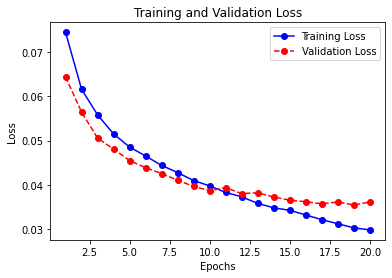

In [26]:
#顯示訓練和驗證損失
loss = history.history['loss']
epochs = range(1, len(loss)+1)
val_loss = history.history['val_loss']
plt.plot(epochs, loss, "bo-", label='Training Loss')
plt.plot(epochs, val_loss, "ro--", label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

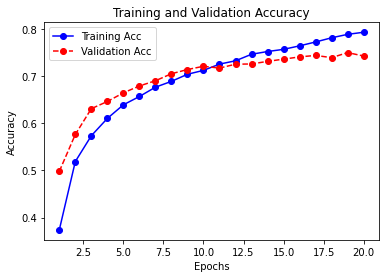

In [27]:
#顯示訓練和驗證準確度
acc = history.history["accuracy"]
epochs = range(1, len(acc)+1)
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "bo-", label="Training Acc")
plt.plot(epochs, val_acc, "ro--", label="Validation Acc")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
from google.colab import drive

In [ ]:
model.save('data/cifar10.h5')#儲存模型